<h1 align="center">Física Computacional</h1>
<h1 align="center">Semestre 2025-4</h1>

<h2>Sergio A. Alcalá Corona</h2>
<h2>Rodrigo Vega Vilchis</h2>

---
### Alumno: Juan Alexis Hernández Hernández
---

<h1 align="center">Práctica 2. Graficación en Python e integración numérica</h1>

In [56]:
# Importamos todas las bibliotecas que vamos a ocupar en toda la tarea
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

https://github.com/saac/Intersemestral_2025-4_8424

### Graficación en Python

#### **1. Gráfica de datos experimentales**: El archivo $\texttt{manchasolares.txt}$ (adjunto), contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo contiene dos columnas de números, la primera es el mes y la segunda el número de manchas solares.

#### **(a)** Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo.

In [57]:
# Leemos el archivo y lo imprimimos
manchasolar = pd.read_csv("manchasolares.txt",sep='\t',header=None)
manchasolar

,0,1
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0
...,...,...
3138,3138,16.1
3139,3139,19.6
3140,3140,25.2
3141,3141,23.5


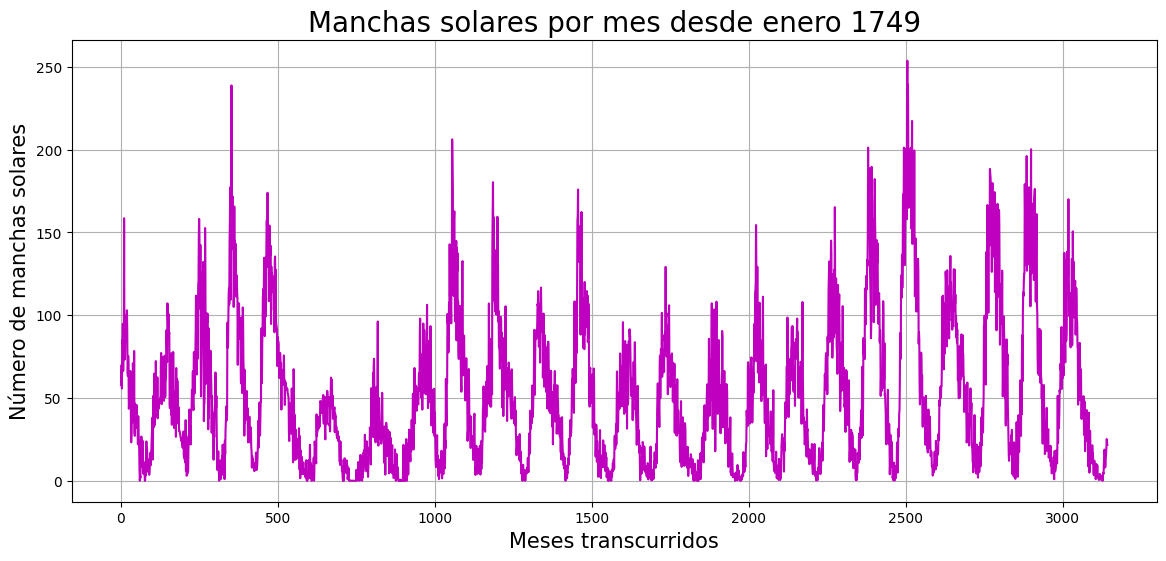

In [58]:
# Separamos los valores de x y y
x = manchasolar[0]
y = manchasolar[1]

# Configuramos la gráfica
pl.figure(figsize=(14,6))
pl.title("Manchas solares por mes desde enero 1749",fontsize=20)
pl.ylabel("Número de manchas solares",fontsize=15)
pl.xlabel("Meses transcurridos",fontsize=15)
pl.grid()
pl.plot(x,y,'m')

#### **(b)** Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

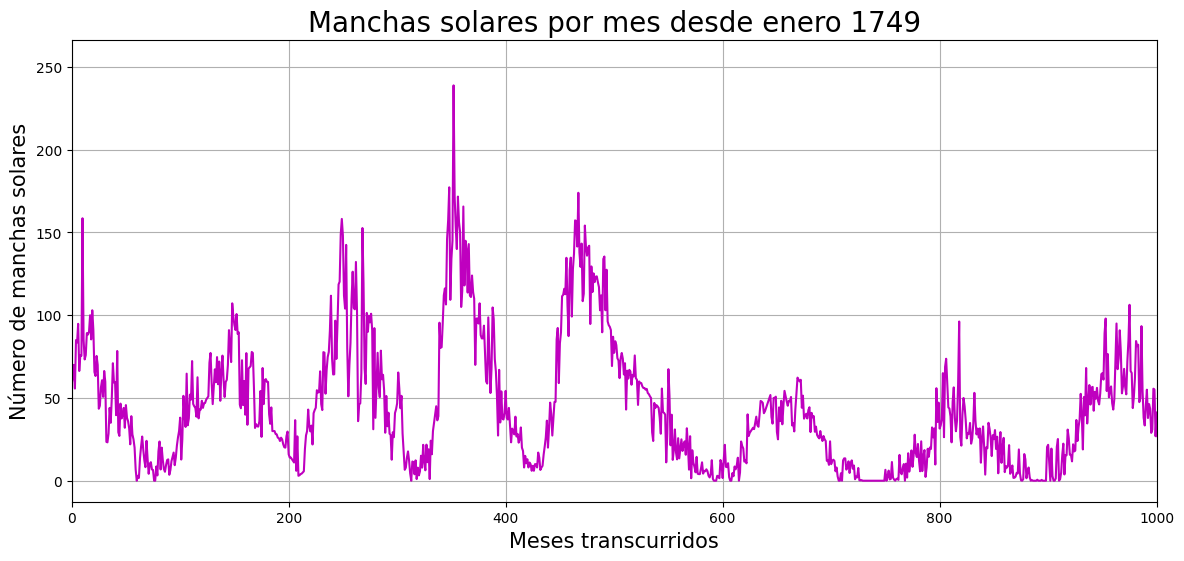

In [75]:
# Separamos los valores de x y y
x = manchasolar[0]
y = manchasolar[1]

# Configuramos la gráfica
pl.figure(figsize=(14,6))
pl.title("Manchas solares por mes desde enero 1749",fontsize=20)
pl.ylabel("Número de manchas solares",fontsize=15)
pl.xlabel("Meses transcurridos",fontsize=15)
pl.xlim(0,1000) # Aquí delimitamos la misma impresión de la gráfica al valor 1000 de x
pl.grid()
pl.plot(x,y,'m')

#### **(c)** Modifica nuevamente tu programa para calcular y graficar la *media (promedio) móvil* de los datos, definida por:

$$Y_k = \frac{1}{2r+1}\sum_{m=-r}^{r}y_{k+m}$$

#### donde $r=5$ (en este caso) y $y_k$ son los números de manchas solares. El programa debe graficar tanto los datos originales como la *media móvil* en el mismo gráfico, sólo sobre los primeros 1000 datos.

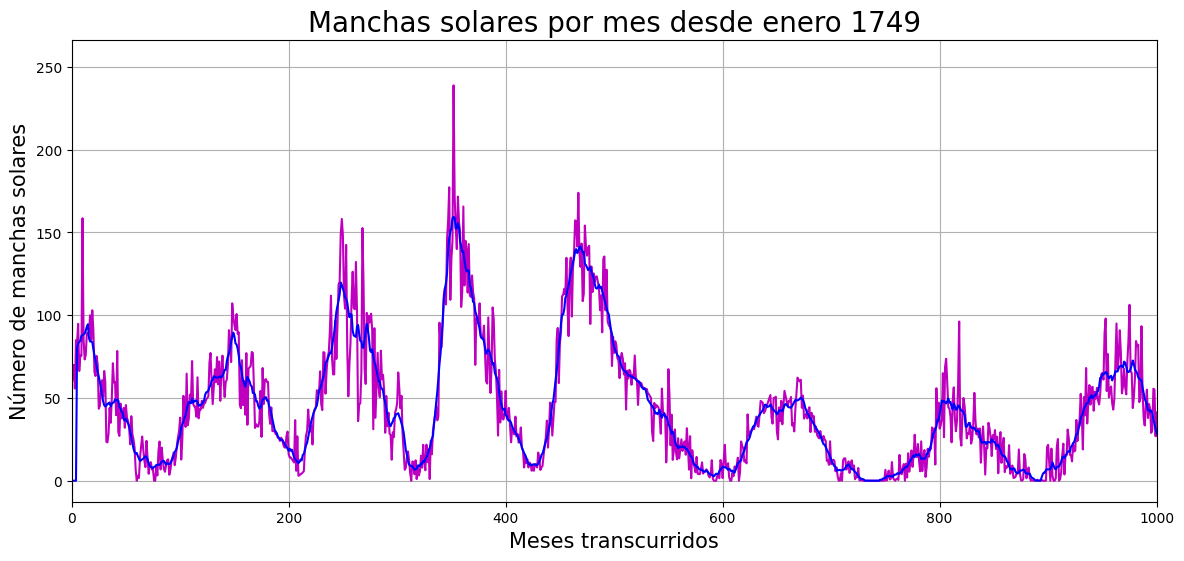

In [133]:
# Los valores de y son los que tienen el número de las manchas solares
y = manchasolar[1].values

# Definimos la media móvil para un valor correspondiente a un mes k
def media(k):
  if k > 4: # Dado que va desde -r, eso nos daría entradas negativas, así que a esos valores le asignamos 0 (ver el else:)
    r = 5
    yk = 0
    for m in range(-r,r+1):
        if k+m < len(y): # Ya que estamos buscando la entrada k+m, hay que asegurarnos que no se salgan de nuestra dimensión
          yk = yk+y[k+m]
        else:
          break
    return (1/(2*r+1))*yk
  else:
    return 0

# Ahora guardamos los valores de la media móvil de los primeros 1000 meses
Y = []
for k in range(0,len(x)): # Para que x y y sean de la misma dimensión
  Y.append(media(k))
Y = np.array(Y)

# Configuramos las gráficas
pl.figure(figsize=(14,6))
pl.title("Manchas solares por mes desde enero 1749",fontsize=20)
pl.ylabel("Número de manchas solares",fontsize=15)
pl.xlabel("Meses transcurridos",fontsize=15)
pl.xlim(0,1000) # Aquí delimitamos la misma impresión de la gráfica al valor 1000 de x
pl.grid()
pl.plot(x,y,'m') # Datos originales
pl.plot(x,Y,'b') # Media movil

In [97]:
len(y)

3143

In [134]:
len(x)

3143

#### **2. Gráfica de curvas**: Aunque la función $\texttt{plot}$ está diseñada principalmente para hacer gráficos $xy$ estándar, se puede adaptar para otros tipos de gráficas también.

#### **(a)** Grafica la llamada curva *deltoide*, definida paramétricamente por las ecuaciones:

$$x = 2Cos\theta + Cos(2\theta) \hspace{2cm} y = 2Sen\theta - Sen(2\theta)$$

#### donde $0\leqθ<2\pi$. Toma un conjunto de valores para $\theta$ entre $0$ y $2\pi$ y calcula $x(θ)$ e $y(θ)$ usando las ecuaciones anteriores, para posteriormente graficar $y$ como función de $x$.

#### **(b)** Usando este mismo enfoque, se puede hacer una gráfica polar $r = f(θ)$ para alguna función $f$ calculando $r$ para un rango de valores de $θ$ y luego convirtiendo $r$ y $θ$ a coordenadas cartesianas usando las ecuaciones estándar:

$$x = rCos\theta \hspace{2cm} y = rSen\theta$$

#### Utiliza este método para trazar la *espiral Galileana* $r = \theta^2$ para $0\leqθ\leq10\pi$.

#### **(c)** Con el mismo método, haz una gráfica polar de la *función de Fey*

$$r = e^{Cos\theta} - 2Cos(4\theta) + Sen^{5}\left( \frac{\theta}{12} \right)$$

#### en el rango $0\leq\theta\leq24\pi$.

#### **3. La gráfica de Feigenbaum (caos determinista)**: En un especial *halloween* de los Simpsons, Homero viaja al pasado a la era Jurásica y por un pequeño descuido cambia el curso de toda la historia en el futuro. Lo anterior es una referencia al cuento *A Sound of Thunder* de 1952 del escritor de ciencia ficción Ray Bradbury en donde lo que se destruye en el pasado es una mariposa. Esta idea fue retomada y popularizada por el físico Edward Lorenz en 1972 cuando dio una conferencia en la Asociación Estadounidense para el Avance de la Ciencia (*American Association for the Advancement of Science*) titulada “¿El aleteo de una mariposa en Brasil puede provocar un tornado en Texas?". Dando paso al concepto del *efecto mariposa*, del cual probablemente hayas oído hablar y que es el ejemplo clásico de *caos determinista* en sistemas climáticos. El caos determinista también aparece en muchos sistemas físicos más complejos, incluyendo especialmente la dináamica de fluidos. Debido a su naturaleza aparentemente aleatoria, el comportamiento de los sistemas caóticos es difícil de predecir y se ve fuertemente afectado por pequeñas perturbaciones en las condiciones iniciales. Uno de los ejemplos más famosos del fenómeno del caos determinista es sin duda el *mapeo logístico*, que es un sistema matemático muy simple, definido por la ecuación:

$$x_{n+1} = rx_n(1-x_n)$$

#### Para un valor dado de la constante $r$, se toma un valor de $x_n$ (digamos $x = \frac{1}{2}$) y se introduce en el lado derecho de esta ecuación y regresa un valor de $x_{n+1}$. Luego se toma ese valor y se vuelve a introducir en el lado derecho, lo que da otro valor, y así sucesivamente. Esto es un *mapeo iterativo*. Se continúa haciendo la misma operación una y otra vez sobre su valor de $x_n$, y entonces sucede una de las tres siguientes situaciones:

1. #### El valor se establece en un número fijo y permanece allí. Esto se llama *punto fijo*. Por ejemplo, $x_n = 0$ es siempre un punto fijo del mapeo logístico. (Si se pone $x_n = 0$ en el lado derecho se obtiene $x_{n+1} = 0$ en el lado izquierdo).
2. #### No se establece en un solo valor, sino que se establece en un patrón periódico, rotando alrededor de un conjunto de valores, digamos cuatro valores, repitiéndose en secuencia una y otra vez. Esto se llama **órbita** (en este caso de periodo 4) o *ciclo límite*.
3. #### Todo enloquece. El mapeo genera una secuencia **aparentemente aleatoria** de números que parecen no tener ni patrón ni razón (*ni ton ni son*). Esto es el ***caos determinista***. “Caos” porque realmente parece caótico, y “determinista” porque, aunque los valores parecen aleatorios, **no lo son**. Son a todas luces totalmente predecibles, porque se obtienen mediante una simple ecuación y el comportamiento está **determinado**, aunque no lo parezca.

#### Responde a las siguientes preguntas:

#### **(a)** Apóyate en el programa que vimos en clase y **escribe un programa que muestre el comportamiento del mapeo logístico** mediante una gráfica.

#### **(b)** De acuerdo a tu gráfica, ¿a qué valor de $r$ el sistema pasa de un comportamiento ordenado (puntos fijos o ciclos límite) a un comportamiento caótico? A este punto a veces se le llama “el borde del caos”.

#### **Hint**: Esto es lo que debes hacer para hacer tu programa:
#### Para un valor dado de $r$, comienza con $x_n = \frac{1}{2}$ e itera la ecuación del mapeo logístico mil veces. Eso le dará la oportunidad de establecerse en un punto fijo o en una órbita de algún periodo. Luego ejecuta otras mil iteraciones y grafica los puntos $(r, x_\infty)$ en una gráfica donde el eje horizontal es $r$ y el eje vertical es $x_\infty$. Puedes usar la función $\texttt{plot}$ con las opciones "ko" o "k." para dibujar una gráfica con puntos, uno para cada valor, o puedes usar la función $\texttt{scatter}$ para dibujar un diagrama de dispersión (que siempre usa puntos). Repite todo el cálculo para valores de $r$ desde $1$ hasta $4$ en pasos de $0.01$, graficando los puntos para todos los valores de $r$ en la misma figura. Tu programa debería generar la distintiva gráfica que parece un árbol inclinado hacia un lado. Esta famosa imagen se llama *Gráfica de Feigenbaum*, en honor a su descubridor Mitchell Feigenbaum.

#### **(c)** ** **Opcional (para 1.5 puntos extra)**: Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más clara y rápida, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos. Crea un arreglo $r$ que contenga cada valor distinto de $r$, $\texttt{[1.0, 1.01, 1.02, ...]}$. Crea otro arreglo $x$ del mismo tamaño para guardar los valores correspondientes de $x$, establecidos inicialmente en $0.5$; finalmente, realiza una iteración del mapeo logístico para todos los valores de $r$ a la vez, con una sola instrucción de la forma $\texttt{x = r*x*(1-x)}$ y compárala con tu programa anterior.


#### **4. El conjunto de Mandelbrot**: El conjunto de Mandelbrot, llamado así por su descubridor, el matemático francés Benoît Mandelbrot, es un *fractal*; un objeto matemático infinitamente ramificado que contiene estructura dentro de estructura dentro de estructura, tan profundamente como queramos mirar. La definición del conjunto de Mandelbrot en términos de números complejos es la siguiente. Consideremos la ecuación:

$$z_{n+1} = z_n^2 + c \hspace{2cm} z_n,c\in\mathbb{C}$$

#### De manera muy similar al *mapeo logístico*, la definición del *conjunto de Mandelbrot* implica la iteración repetida de esta ecuación para cualquier valor dado de $c$. La ecuación convierte un número de entrada $z_n$ en un número de salida $z_{n+1}$; de tal manera que se toma un valor inicial de $z_0$ y se introduce en la ecuación para obtener un nuevo valor $z_1$, luego tomamos ese valor y lo volvemos a introducir para obtener $z_2$, y así sucesivamente.

#### Así, el conjunto de Mandelbrot es el conjunto de puntos del plano complejo que satisface la siguiente definición:

#### *Para un valor dado de $c$ y la condición inicial $z_0 = 0$; si al iterar repetidamente la ecuación la magnitud del valor resultante es mayor a dos (i.e. $|z_\infty| > 2$), entonces el punto del plano complejo para ese valor de $c$ \textbf{no} está en el conjunto de Mandelbrot; de lo contrario, sí está en el conjunto.*

#### Para utilizar esta definición, en principio habría que iterar infinitas veces para demostrar que un punto está en el conjunto de Mandelbrot, ya que un punto pertenece al conjunto solo si la iteración nunca sobrepasa $|z_n| = 2$. Sin embargo, en la práctica, simplemente se realiza una gran cantidad de iteraciones (digamos 100), y si $|z_n|$ no ha excedido $2$ en ese momento, entonces lo consideramos suficientemente bueno.

#### **(a)** **Escribe un programa para crear una imagen del conjunto de Mandelbrot** realizando la iteración para todos los valores de $c = x + iy$ en una cuadrícula de $N \times N$ que abarque la región donde $-2 \leq x \leq 2$ y $-2 \leq y \leq 2$. Haz una gráfica de densidad (*density plot*) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.

#### ***Sugerencia***: Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decir, con un valor pequeño de $N$ (quizás $N = 100$), para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen final de alta calidad de la forma del conjunto.

#### **(b)** ** **Opcional (para 1.5 puntos extra)**: Si te aburrió lo anterior (o te resultó demasiado fácil), puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorear los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de que $|z_n|$ sea mayor que $2$ (o bien el número máximo de iteraciones si es que $|z_n|$ nunca llega a ser mayor que $2$). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como $\texttt{"hot"}$ o $\texttt{"jet"}$, puedes crear algunas imágenes muy espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.